# House Sale Price Prediction

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Necessary Libraries](#section2)<br>
3. [Read the Data](#section3)<br>
4. [Initial Data Exploration](#section4)<br>
  - 4.1 [Check if the data is read correctly by checking first few rows](#section401)<br>
  - 4.2 [Check the total number of rows and columns in the data](#section402)<br>
  - 4.3 [Check the data types and figure out if there are any Null values existing in the data set](#section403)<br>
  - 4.4 [List out the columns which are containing Null values so that we can deal with them accordingly](#section404)<br>
  - 4.5 [Check Columns containing Null Values in % in descending order](#section405)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Airport and Carrier Details](#section501)<br>
    - 5.1.1 [Which were the top 5 flight carriers from NYC in 2013?](#section50101)<br>
    - 5.1.2 [Airports which have maximum number of flights departed from NYC in 2013?](#section50102)<br>
    - 5.1.3 [From each Airport witnin NYC, which are the highest flying carriers?](#section50103)<br>
    - 5.1.4 [Top 5 carriers which have flown maximum miles in 2013 from NYC to various destinations](#section50104)<br>
    - 5.1.5 [Which are the top 20 Destinations from NYC?](#section50105)<br>
  - 5.2 [Departure Analysis](#section502)<br>
    - 5.2.1 [Monthly view of flights departed per carrier?](#section50201)<br>
    - 5.2.2 [Is there any pattern visible resulting into flight departure delays?](#section50202)<br>
    - 5.2.3 [Which carriers operate on daily basis?](#section50203)<br>
    - 5.2.4 [What is the overall departure pattern looking like?](#section50204)<br>
  - 5.3 [Arrival Analysis](#section502)<br>
    - 5.3.1 [How does the flight arrival status look like over 2013?](#section50301)<br>
    - 5.3.2 [Is there any pattern visible resulting into flight arrival delays?](#section50302)<br>
    - 5.3.3 [How are the key Arrival and Departure Parameters Co-related? Is there any emerging pattern?](#section50303)<br>
6. [Conclusion](#section6)

<a id='#section1'></a>
### 1. Problem Statement

The goal of this project is to predict the best selling price of a house given various critical parameters which will form the basis of how the predicted price has been arrived at.

<a id='#section2'></a>
### 2. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
#sns.set()      # To apply seaborn styles to the plots.

from subprocess import check_output

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 500                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools

<a id='#section3'></a>
### 3. Read the Data

In [2]:
raw_data = pd.read_csv("E:\\Trainings\\INSAID\\CDF - Machine Learning - Term Project\\house_data.csv")

<a id='#section4'></a>
### 4. Initial Data Exploration

<a id='#section401'></a>
#### 4.1 Check if the data is read correctly by checking first few rows

In [3]:
raw_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Observation:** The dataset is loaded correctly for processing

<a id='#section402'></a>
#### 4.2 Check the total number of rows and columns in the data

In [4]:
raw_data.shape

(1460, 81)

**Observation:** There are **1460 rows** and **81 columns** in the dataset

<a id='#section403'></a>
#### 4.3 Check the data types and figure out if there are any Null values existing in the data set

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Observation:**
1. There are a total of 1460 samples (rows) and 81 columns in the dataframe 
2. As observed, there 3 Float columns, 35 Integer columns whereas 43 columns are of Object data type in the dataset
3. In addition to the data types, we can also see lot of columns having Null values

<a id='#section404'></a>
#### 4.4 List out the columns which are containing Null values so that we can deal with them accordingly

In [6]:
null_columns = raw_data.columns[raw_data.isnull().any()]
(raw_data[null_columns].isnull().sum()).sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu     690 
LotFrontage     259 
GarageYrBlt     81  
GarageType      81  
GarageFinish    81  
GarageQual      81  
GarageCond      81  
BsmtFinType2    38  
BsmtExposure    38  
BsmtFinType1    37  
BsmtCond        37  
BsmtQual        37  
MasVnrArea      8   
MasVnrType      8   
Electrical      1   
dtype: int64

**Observation:**
1. As can be seen above, there are 19 columns which are containing Null values
2. **PoolQC - 1453, MiscFeature - 1406, Alley - 1369, Fence - 1179 and FireplaceQu - 690** are having large number of Null values, whereas, rest of the columns do contain Null values but not extensively

<a id='#section405'></a>
#### 4.5 Check Columns containing Null Values in % in descending order

In [7]:
(((raw_data[null_columns].isnull().sum())/(raw_data.shape[0]))*100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt     5.547945 
GarageType      5.547945 
GarageFinish    5.547945 
GarageQual      5.547945 
GarageCond      5.547945 
BsmtFinType2    2.602740 
BsmtExposure    2.602740 
BsmtFinType1    2.534247 
BsmtCond        2.534247 
BsmtQual        2.534247 
MasVnrArea      0.547945 
MasVnrType      0.547945 
Electrical      0.068493 
dtype: float64

**Observation:** We can see that columns PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual show up as having large number of Null values, thats mainly due to NA available in the data. These NA's are not really Null values, but are actual values, so we will update them with "None" so that they make sense 

#### 5. Descriptive Statistics and Data Profiling

In [8]:
raw_data.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
96%,1401.640000,160.000000,110.000000,18857.600000,9.000000,8.000000,2007.000000,2008.000000,490.600000,1309.000000,479.640000,1523.320000,1834.920000,1882.240000,1183.920000,0.000000,2545.720000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,10.000000,2.000000,2007.000000,3.000000,867.280000,359.200000,193.920000,193.280000,0.000000,180.000000,0.000000,0.000000,11.640000,2010.000000,344151.480000


#### Initial Observations from describe
A. LotFrontage:<BR>
1. Mean and Std Dev looks fine <br>
2. There are few Null values (259 to be precise)<br>

B. LotArea: <BR>
1. 99% of LotArea values are showing below or equal to 37567.00, whereas, max value is 215245, its an outlier and needs to be excluded from our analysis <BR>
2. Values above 18000 LotArea can be excluded from analysis as it's on the higher side compared to mean which is anyways effected by higher outlier value, and secondly, values about 18000 form 79 records out of 1460 which is just over 5% of total records and might not impact our analysis<BR>

C. MasVnrArea: <BR>
1. Mean and Std Dev looks fine<br>
2. There is an outlier value of 1600.00 which is far away from 99% value of 791.92<br>
3. There are very few Null values observed, only 8 to be precise<br>

## A. Dealing with NULL Values

In [9]:
#profile = raw_data.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="E:\\Trainings\\INSAID\\CDF - Machine Learning - Term Project\\pre_profile_report.html")

In [10]:
# Create a copy of raw_data so that we can handle null values, outliers, extract required features, etc. without disturbing original data
# We can drop the 'Id' column as it's just a sequential number and not help in our analysis
data = raw_data.copy()
original_ids = data['Id']
data.drop(['Id'],axis=1, inplace=True)
data.shape

(1460, 80)

**Observation:** Looking at the above outcome, it seems that Null values in LotFrontage variable can be dealt with by updating the mean values as there are 259 such records out of 1460 which contain Null

In [11]:
def print_dist_stats(col):
    x = col
    x_mean = x.mean()
    print("Mean: ", x_mean)
    x_median = x.median()
    print("Median: ", x_median)
    x_mode = x.mode()
    print("Mode: ", x_mode)

In [12]:
# Check the mean median and mode for LotFrontage variable and based on the outcome decide how to deal with Null values
print_dist_stats(data['LotFrontage'])

print("LotFrontage Null Count before cleansing: ", data['LotFrontage'].isnull().sum())
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
print("LotFrontage Null Count after cleansing: ",data['LotFrontage'].isnull().sum())

Mean:  70.04995836802665
Median:  69.0
Mode:  0    60.0
dtype: float64
LotFrontage Null Count before cleansing:  259
LotFrontage Null Count after cleansing:  0


In [13]:
# MasVnrArea
print_dist_stats(data['MasVnrArea'])
print("MasVnrArea Null Count before cleansing: ", data['MasVnrArea'].isnull().sum())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
print("MasVnrArea Null Count after cleansing: ",data['MasVnrArea'].isnull().sum())

Mean:  103.68526170798899
Median:  0.0
Mode:  0    0.0
dtype: float64
MasVnrArea Null Count before cleansing:  8
MasVnrArea Null Count after cleansing:  0


In [14]:
# GarageYrBlt
print_dist_stats(data['GarageYrBlt'])
print("GarageYrBlt Null Count before cleansing: ", data['GarageYrBlt'].isnull().sum())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1900)
print("GarageYrBlt Null Count after cleansing: ",data['GarageYrBlt'].isnull().sum())

Mean:  1978.5061638868744
Median:  1980.0
Mode:  0    2005.0
dtype: float64
GarageYrBlt Null Count before cleansing:  81
GarageYrBlt Null Count after cleansing:  0


In [15]:
data_null_columns = data.columns[data.isnull().any()]
print((((data[data_null_columns].isnull().sum())/(data.shape[0]))*100).sort_values(ascending=False))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageCond      5.547945 
GarageQual      5.547945 
GarageFinish    5.547945 
GarageType      5.547945 
BsmtFinType2    2.602740 
BsmtExposure    2.602740 
BsmtFinType1    2.534247 
BsmtCond        2.534247 
BsmtQual        2.534247 
MasVnrType      0.547945 
Electrical      0.068493 
dtype: float64


In [16]:
# Drop Columns having Null Values above 80% looking as they are huge and might not add any value to our analysis
#data.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1, inplace=True)

In [17]:
data_null_columns = data.columns[data.isnull().any()]
print(((data[data_null_columns].isnull().sum())).sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu     690 
GarageCond      81  
GarageQual      81  
GarageFinish    81  
GarageType      81  
BsmtFinType2    38  
BsmtExposure    38  
BsmtFinType1    37  
BsmtCond        37  
BsmtQual        37  
MasVnrType      8   
Electrical      1   
dtype: int64


In [18]:
# Even though PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, 
# BsmtFinType1, BsmtCond, BsmtQual shows as Null values, based on data description, NA is a valid value hence we 
# can update a valid text like NN (Not Null) instead of NA so that it does not get picked by isnull
a = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']
for i in a:
    data[i].fillna('NN', inplace=True)
    
#PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual

#data['FireplaceQu'].fillna('NN', inplace=True)

In [19]:
data_null_columns = data.columns[data.isnull().any()]
print(((data[data_null_columns].isnull().sum())).sort_values(ascending=False))

Series([], dtype: float64)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [21]:
data.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99], include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,6,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NN,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NN,NN,NN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,690,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1974.150685,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,29.982047,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000

In [22]:
data.shape

(1460, 80)

**Observation:**
1. As we can see from the Info and Describe output, we have dealt with all the Null values approproiately without deleting any rows
2. We have dropped 'Id' column as its just a unique identified and not required for our analysis
3. Thus, we now have 1460 rows and 80 columns to deal with from hereon
4. As we have dealt with Null values, we will now deal with outliers next

## B. Dealing with Outliers

**Exploring Probability Distribution Functions (PDFs)**

In [23]:
data_1 = data.copy()

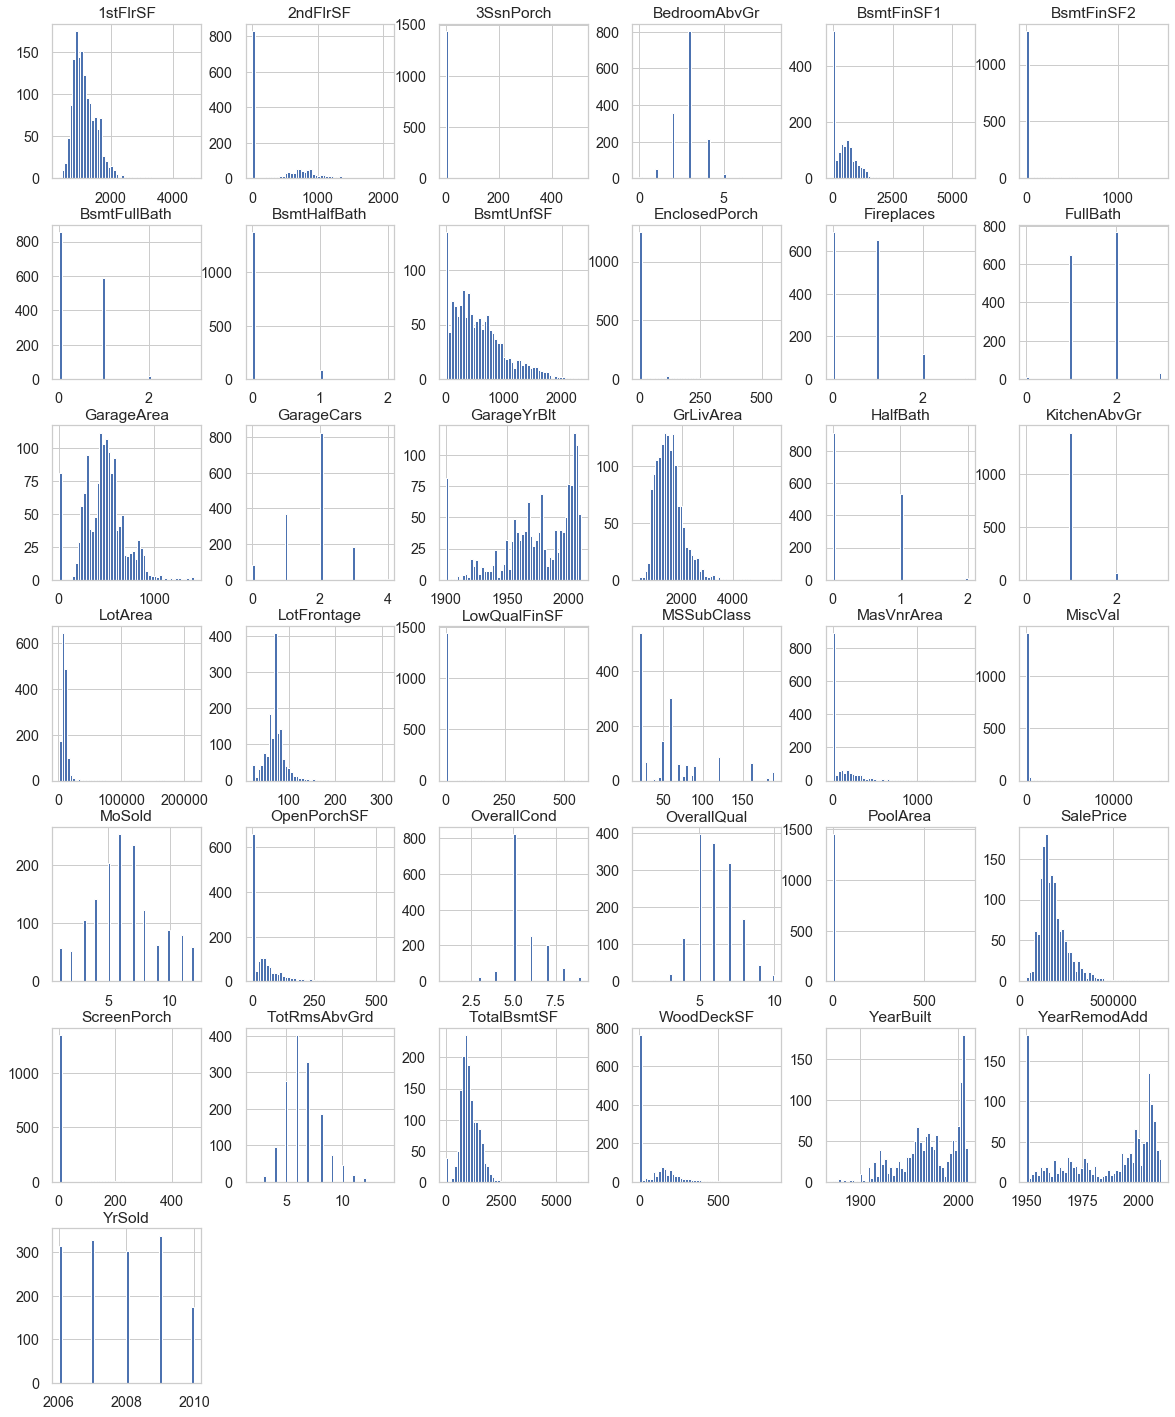

In [24]:
data_1.hist(bins=50, figsize=(20,25))
plt.show()

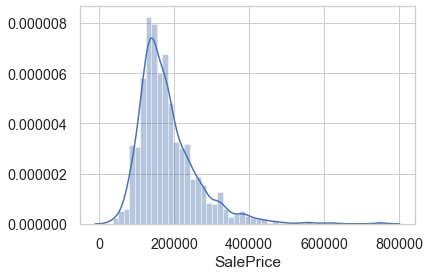

In [25]:
# Firstly let's check the target variable if it's normally didtributed, if not, lets normalize it
sns.distplot(data_1['SalePrice'])

Skewness Before Log Transformation is:  1.8828757597682129
Skewness After Log Transformation is:  0.12133506220520406


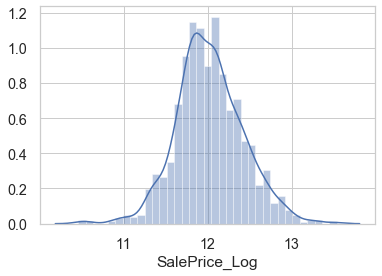

In [26]:
print ('Skewness Before Log Transformation is: ', data_1['SalePrice'].skew())
data_1['SalePrice_Log'] = np.log(data_1['SalePrice'])
print ('Skewness After Log Transformation is: ', data_1['SalePrice_Log'].skew())
sns.distplot(data_1['SalePrice_Log'])

In [27]:
# As we have taken natural log of SalePrice, we don't need original column any more, hence, let's drop it
data_1.drop('SalePrice',axis=1, inplace=True)

In [28]:
data_1.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1974.150685,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,29.982047,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.535376
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,12.694958
96%,160.000000,107.000000,18857.600000,9.000000,8.000000,2007.000000,2008.000000,487.400000,1309.000000,479.640000,1523.320000,1834.9200

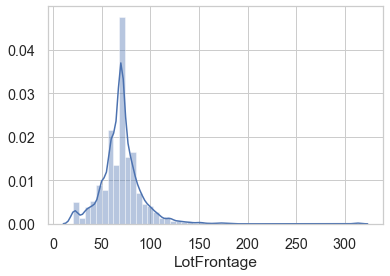

In [29]:
sns.distplot(data_1['LotFrontage'])

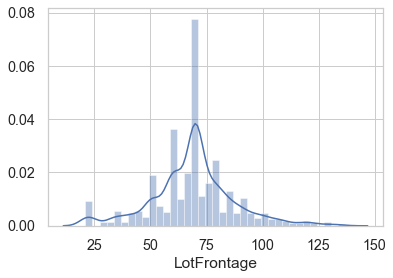

In [30]:
q = data_1['LotFrontage'].quantile(0.99)
data_2 = data_1[data_1['LotFrontage']<q]
sns.distplot(data_2['LotFrontage'])

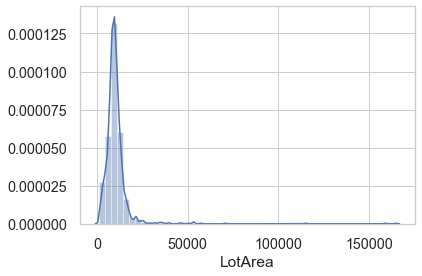

In [31]:
sns.distplot(data_2['LotArea'])

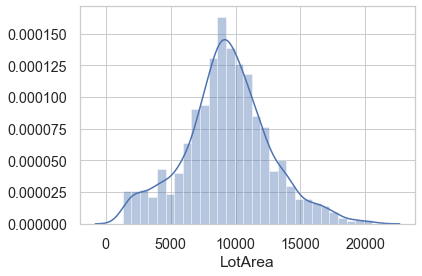

In [32]:
q = data_2['LotArea'].quantile(0.97)
data_3 = data_2[data_2['LotArea']<=q]
sns.distplot(data_3['LotArea'])

In [33]:
quantitative = [f for f in data_3.columns if data_3.dtypes[f] != 'object']
qualitative = [f for f in data_3.columns if data_3.dtypes[f] == 'object']

In [34]:
#f = pd.melt(data_3, value_vars=quantitative)
#g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")

In [35]:
data_3.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.00000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,57.166310,68.749422,9344.763026,6.084939,5.575303,1971.424697,1984.887223,101.267666,428.193433,45.013562,570.083512,1043.290507,1147.030692,339.481799,5.060671,1491.573162,0.413990,0.055675,1.556031,0.381870,2.858672,1.047109,6.476802,0.588865,1974.293362,1.752320,468.276231,91.201999,45.62955,21.640971,3.123483,14.633833,1.770878,44.463954,6.331192,2007.820128,12.011456
std,42.435668,18.369842,3326.945537,1.367190,1.107863,30.292082,20.637590,174.001007,422.758572,157.499430,443.589164,409.573599,363.406028,425.921951,44.345042,484.071548,0.508419,0.235520,0.541065,0.503346,0.805347,0.221828,1.584635,0.628596,30.080136,0.745968,210.503444,120.686157,64.64762,59.447014,28.324644,54.642129,33.394733,505.941046,2.691034,1.326292,0.390987
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7446.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,225.000000,793.000000,876.000000,0.000000,0.000000,1124.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,318.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.767568
50%,50.000000,70.049958,9303.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,377.000000,0.000000,481.000000,982.000000,1078.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,476.000000,0.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.982929
75%,70.000000,78.000000,11250.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,697.000000,0.000000,806.000000,1272.000000,1368.000000,728.000000,0.000000,1762.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,66.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.254863
90%,120.000000,90.000000,13526.000000,8.000000,7.000000,2006.000000,2006.000000,324.000000,1032.000000,108.000000,1237.000000,1584.000000,1659.000000,928.000000,0.000000,2121.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,749.000000,252.000000,129.00000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.524526
95%,160.000000,100.000000,14892.000000,8.000000,8.000000,2007.000000,2007.000000,442.000000,1237.000000,391.000000,1470.000000,1732.000000,1795.000000,1116.000000,0.000000,2398.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,842.000000,324.000000,170.00000,177.000000,0.000000,156.000000,0.000000,0.000000,11.000000,2010.000000,12.676076
96%,160.000000,103.000000,15602.000000,8.000000,8.000000,2007.000000,2008.000000,472.000000,1282.000000,472.000000,1530.000000,1795.000000,1844.000

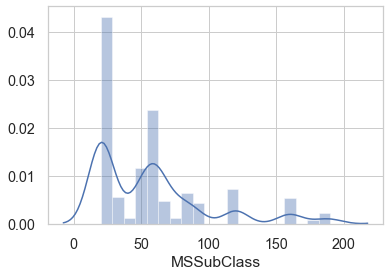

In [36]:
sns.distplot(data_3['MSSubClass'])

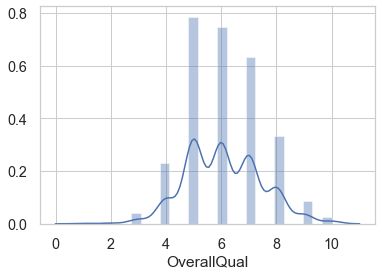

In [37]:
sns.distplot(data_3['OverallQual'])

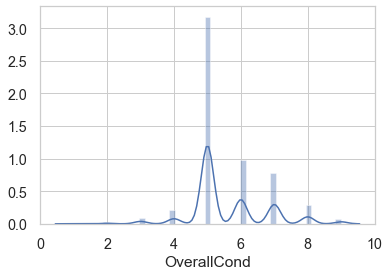

In [38]:
sns.distplot(data_3['OverallCond'])

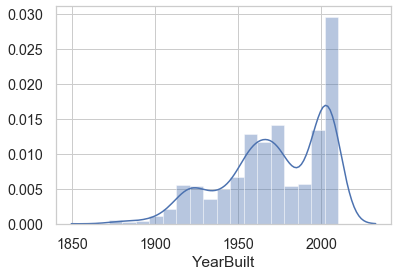

In [39]:
sns.distplot(data_3['YearBuilt'])

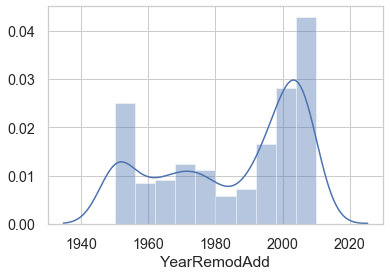

In [40]:
sns.distplot(data_3['YearRemodAdd'])

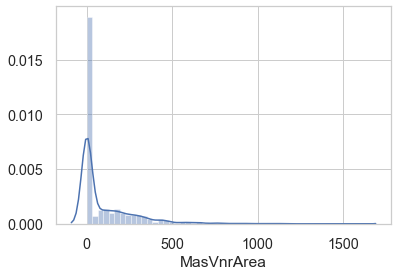

In [41]:
sns.distplot(data_3['MasVnrArea'])

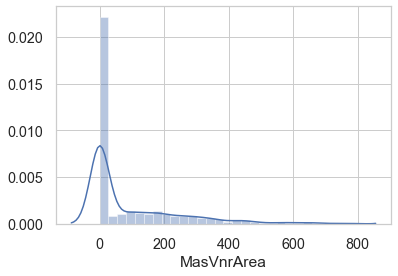

In [42]:
q = data_3['MasVnrArea'].quantile(0.99)
data_4 = data_3[data_3['MasVnrArea']<=q]
sns.distplot(data_4['MasVnrArea'])

In [43]:
data_4.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,57.065609,68.632257,9320.856525,6.066330,5.580389,1971.158616,1984.752704,92.383562,426.891132,45.375631,566.369863,1038.636626,1143.314348,335.819034,5.111752,1484.245133,0.414564,0.056236,1.550829,0.378515,2.856525,1.047585,6.462870,0.583273,1974.054795,1.743331,465.920692,90.584715,45.764239,21.832733,3.155011,14.638789,1.788753,44.912761,6.335256,2007.823360,12.005580
std,42.429868,18.254077,3305.610429,1.352113,1.111979,30.303004,20.660245,149.197410,419.910777,158.216725,438.257336,405.108632,359.160173,423.488380,44.565513,477.497076,0.508674,0.236639,0.539338,0.502720,0.806918,0.222895,1.577904,0.627147,30.111647,0.742750,209.162267,120.440584,64.854983,59.707991,28.465590,54.677726,33.562493,508.470048,2.694539,1.326749,0.386849
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7442.000000,5.000000,5.000000,1953.500000,1967.000000,0.000000,0.000000,0.000000,223.500000,793.000000,874.500000,0.000000,0.000000,1121.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.767568
50%,50.000000,70.049958,9286.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,482.000000,980.000000,1075.000000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,474.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.982929
75%,70.000000,78.000000,11238.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,697.000000,0.000000,803.500000,1268.000000,1362.500000,720.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.244811
90%,120.000000,90.000000,13500.400000,8.000000,7.000000,2006.000000,2006.000000,309.400000,1024.000000,108.800000,1232.800000,1577.000000,1652.800000,918.800000,0.000000,2108.800000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2006.000000,3.000000,742.400000,250.800000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.516488
95%,160.000000,100.000000,14882.100000,8.000000,8.000000,2007.000000,2007.000000,422.100000,1227.700000,391.000000,1465.300000,1727.400000,1778.100000,1109.500000,0.000000,2373.400000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,840.000000,323.400000,170.000000,179.100000,0.000000,155.700000,0.000000,0.000000,11.000000,2010.000000,12.669941
96%,160.000000,102.000000,15598.040000,8.000000,8.000000,2007.000000,2008.000000,442.560000,1275.680000,475.920000,1509.280000,1758.600000,

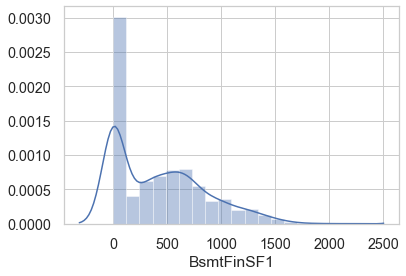

In [44]:
sns.distplot(data_4['BsmtFinSF1'])

In [45]:
#data_4['BsmtFinSF1_Log'] = np.log(data_4['BsmtFinSF1'])
#sns.distplot(data_4['BsmtFinSF1_Log'])

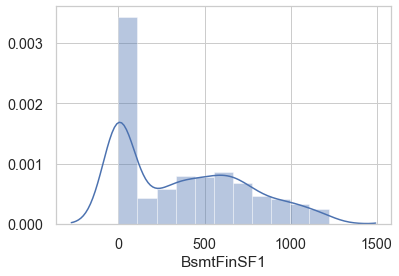

In [46]:
q = data_4['BsmtFinSF1'].quantile(0.95)
data_5 = data_4[data_4['BsmtFinSF1']<=q]
#q1 = data_5['BsmtFinSF1'].quantile(0.01)
#data_6 = data_5[data_5['BsmtFinSF1']>q1]
sns.distplot(data_5['BsmtFinSF1'])

In [47]:
data_5.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,58.029613,68.121747,9166.104784,5.977980,5.603645,1969.898254,1984.012149,84.626424,374.924829,47.108580,578.430524,1000.463933,1109.555809,348.778284,5.383447,1463.717540,0.381929,0.054670,1.532270,0.384966,2.869400,1.047077,6.421412,0.552012,1973.003797,1.704632,454.776765,86.542901,44.818527,22.503417,2.975702,14.035687,1.883827,45.781321,6.312073,2007.821564,11.974617
std,42.662276,18.051080,3245.901059,1.288941,1.118069,30.361805,20.738160,140.217244,361.517176,161.378808,440.728017,371.370850,329.531390,425.851767,45.719405,473.456296,0.496867,0.234008,0.540094,0.505158,0.799666,0.222382,1.567895,0.611247,30.209916,0.728335,204.588568,118.836715,64.757096,60.315579,27.694891,53.650559,34.440946,518.924813,2.664174,1.325764,0.363609
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7313.000000,5.000000,5.000000,1951.000000,1966.000000,0.000000,0.000000,0.000000,239.000000,780.000000,864.000000,0.000000,0.000000,1110.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.759786
50%,50.000000,70.049958,9144.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,340.000000,0.000000,495.000000,956.000000,1055.000000,0.000000,0.000000,1414.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,462.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.957611
75%,70.000000,77.000000,11000.000000,7.000000,6.000000,2000.000000,2003.000000,138.000000,656.000000,0.000000,816.000000,1215.000000,1310.000000,729.000000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,572.000000,158.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.206073
90%,120.000000,89.000000,13125.000000,8.000000,7.000000,2005.000000,2006.000000,294.400000,904.400000,119.800000,1240.000000,1486.800000,1569.800000,929.400000,0.000000,2090.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,691.800000,240.000000,129.400000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.446504
95%,160.000000,98.200000,14585.400000,8.000000,8.000000,2007.000000,2007.000000,382.200000,1036.000000,402.200000,1472.000000,1640.200000,1707.600000,1112.800000,0.000000,2359.400000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,834.000000,316.000000,169.000000,180.600000,0.000000,152.400000,0.000000,0.000000,11.000000,2010.000000,12.567300
96%,160.000000,101.000000,15274.000000,8.000000,8.000000,2007.000000,2007.000000,423.360000,1065.000000,480.000000,1528.720000,1684.720000,17

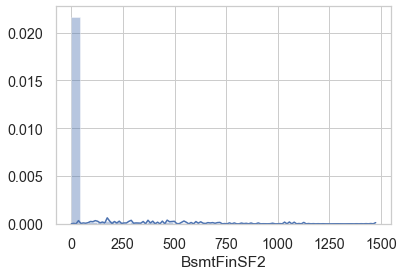

In [48]:
sns.distplot(data_5['BsmtFinSF2'])

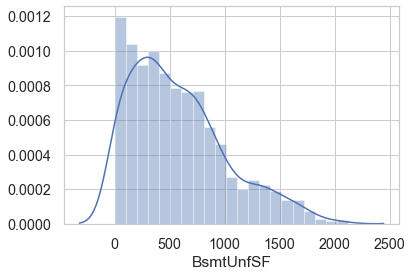

In [49]:
sns.distplot(data_5['BsmtUnfSF'])

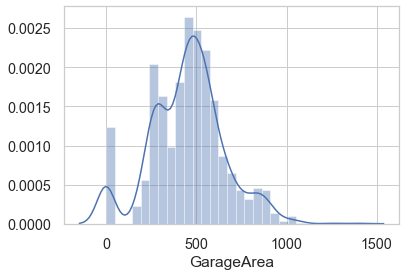

In [50]:
sns.distplot(data_5['GarageArea'])

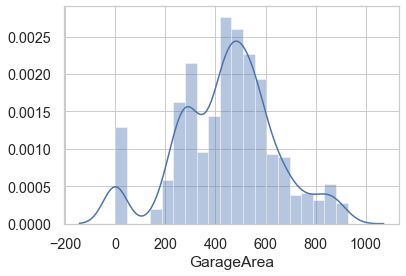

In [51]:
q = data_5['GarageArea'].quantile(0.99)
data_6 = data_5[data_5['GarageArea']<q]
sns.distplot(data_6['GarageArea'])

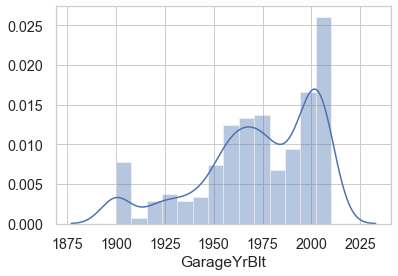

In [52]:
sns.distplot(data_6['GarageYrBlt'])

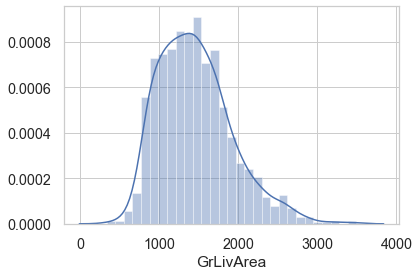

In [53]:
sns.distplot(data_6['GrLivArea'])

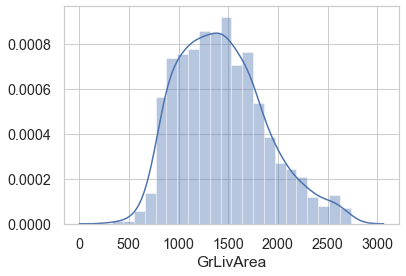

In [54]:
q = data_6['GrLivArea'].quantile(0.99)
data_7 = data_6[data_6['GrLivArea']<q]
sns.distplot(data_7['GrLivArea'])

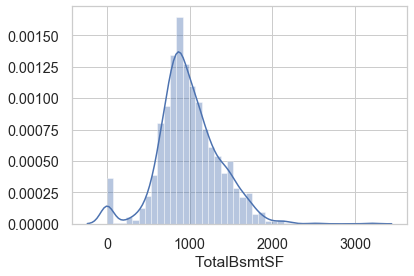

In [55]:
sns.distplot(data_7['TotalBsmtSF'])

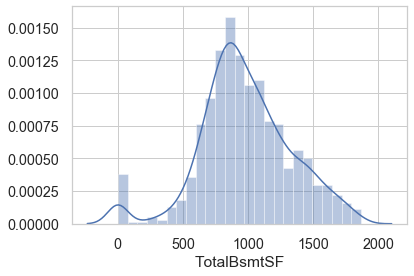

In [56]:
q = data_7['TotalBsmtSF'].quantile(0.99)
data_8 = data_7[data_7['TotalBsmtSF']<q]
sns.distplot(data_8['TotalBsmtSF'])

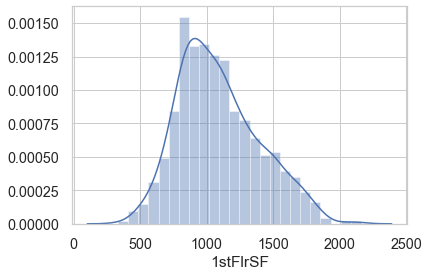

In [57]:
sns.distplot(data_8['1stFlrSF'])

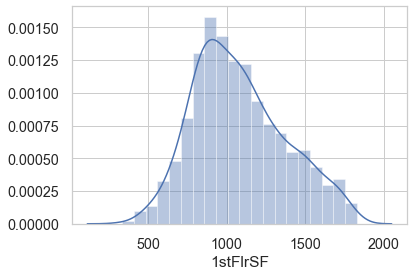

In [58]:
q = data_8['1stFlrSF'].quantile(0.99)
data_9 = data_8[data_8['1stFlrSF']<q]
sns.distplot(data_9['1stFlrSF'])

In [59]:
data_cleaned = data_9.reset_index(drop=True)

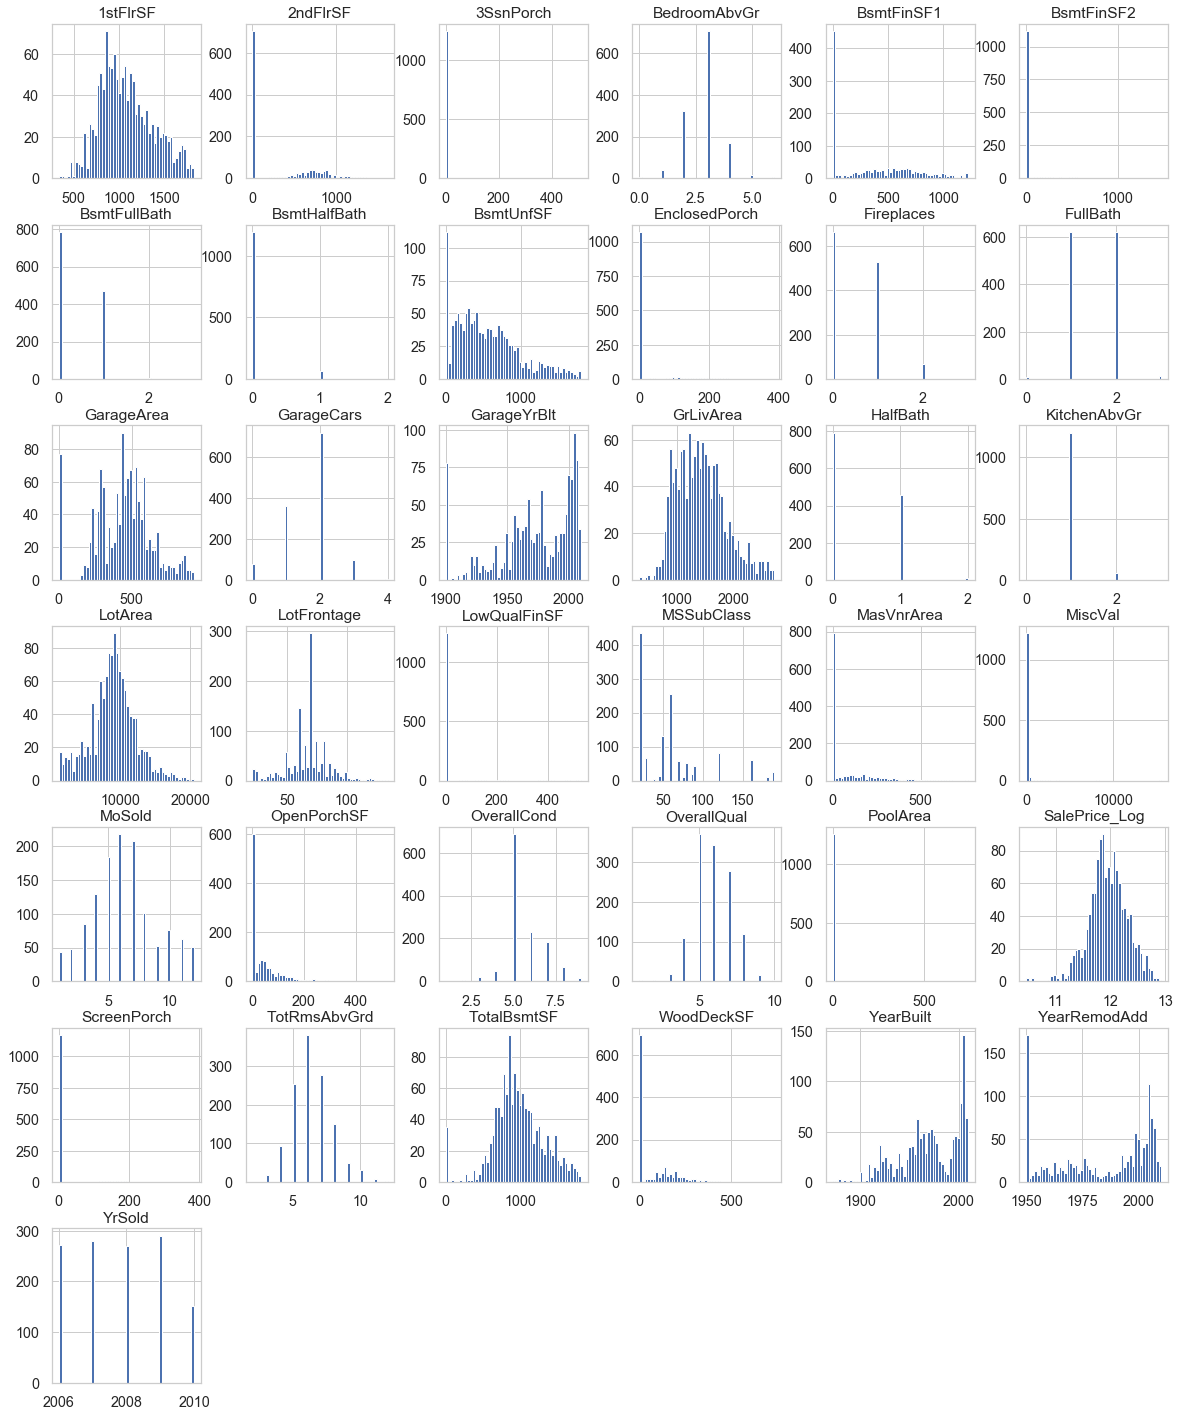

In [60]:
data_cleaned.hist(bins=50, figsize=(20,25))
plt.show()

In [61]:
data_cleaned.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,58.580492,67.386115,9013.065821,5.926249,5.607454,1969.588422,1983.656622,79.846947,371.662966,46.034893,557.614592,975.312450,1080.341792,341.640761,4.899286,1426.881840,0.382236,0.055511,1.507534,0.379857,2.842189,1.045995,6.325932,0.528152,1972.480571,1.671689,442.457573,84.295797,43.055511,22.864393,3.107851,13.215702,1.555908,44.872324,6.303727,2007.817605,11.952686
std,42.991408,17.770403,3182.953438,1.259296,1.113656,30.245417,20.815370,134.643184,357.607087,159.563662,421.686866,341.801654,292.861010,415.268577,43.056388,434.299909,0.497424,0.235894,0.530931,0.503203,0.775414,0.220627,1.482983,0.600430,30.364254,0.713853,193.573937,116.777936,61.656255,60.713782,28.296381,50.676325,32.037569,526.263831,2.663193,1.326186,0.348323
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1950.000000,1965.000000,0.000000,0.000000,0.000000,224.000000,777.000000,864.000000,0.000000,0.000000,1094.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.751942
50%,50.000000,70.049958,9042.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,338.000000,0.000000,482.000000,944.000000,1040.000000,0.000000,0.000000,1383.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1976.000000,2.000000,457.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.944708
75%,70.000000,75.000000,10800.000000,7.000000,6.000000,1999.000000,2003.000000,130.000000,650.000000,0.000000,796.000000,1188.000000,1269.000000,728.000000,0.000000,1694.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,558.000000,154.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.173033
90%,120.000000,87.000000,12803.000000,8.000000,7.000000,2005.000000,2006.000000,278.000000,900.000000,117.000000,1198.000000,1442.000000,1506.000000,910.000000,0.000000,2008.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,672.000000,239.000000,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.387977
95%,160.000000,96.000000,14175.000000,8.000000,8.000000,2007.000000,2007.000000,362.000000,1016.000000,391.000000,1417.000000,1573.000000,1634.000000,1081.000000,0.000000,2267.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,786.000000,309.000000,166.000000,183.000000,0.000000,147.000000,0.000000,0.000000,11.000000,2010.000000,12.526343
96%,160.000000,100.000000,14696.400000,8.000000,8.000000,2007.000000,2007.000000,411.200000,1054.800000,476.800000,1481.200000,1607.600000,166

In [62]:
#test_data=data_cleaned.copy()
#(test_data[null_columns].isnull().sum()).sort_values(ascending=False)
#numeric_features = test_data.dtypes[test_data.dtypes != 'object'].index
#test_data[numeric_features] = test_data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
# After standardizing the data all means vanish, hence we can set missing values to 0
#test_data[numeric_features] = test_data[numeric_features].fillna(0)
#all_features = pd.get_dummies(test_data, dummy_na=True)
#all_features.shape

**Observation:** Majority of the key outliers have been dealt with and as we can see from combined Hist, more or less the key features seems to have normal distribution. The ones which do not have normal distribution, have some vaild values at the extreme ends, like 0 or a Year, hence tampering them will reduce data drastically, so instead, we will let these so-be outliers remain as-is

We will now be relaxing some regression assumptions 

## Checking the OLS assumptions

### Linearity

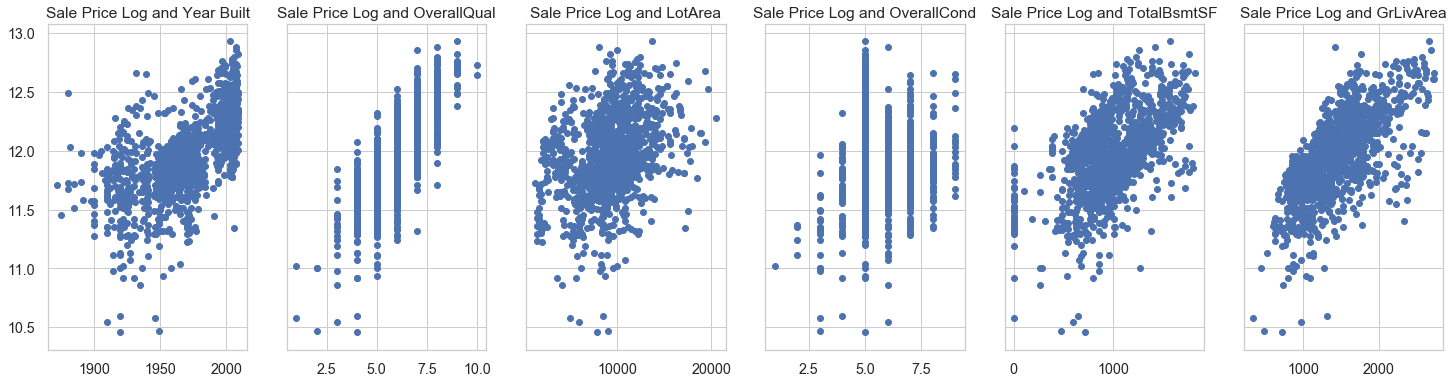

In [63]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Sale Price Log is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(25,6)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['YearBuilt'],data_cleaned['SalePrice_Log'])
ax1.set_title('Sale Price Log and Year Built')
ax2.scatter(data_cleaned['OverallQual'],data_cleaned['SalePrice_Log'])
ax2.set_title('Sale Price Log and OverallQual')
ax3.scatter(data_cleaned['LotArea'],data_cleaned['SalePrice_Log'])
ax3.set_title('Sale Price Log and LotArea')
ax4.scatter(data_cleaned['OverallCond'],data_cleaned['SalePrice_Log'])
ax4.set_title('Sale Price Log and OverallCond')
ax5.scatter(data_cleaned['TotalBsmtSF'],data_cleaned['SalePrice_Log'])
ax5.set_title('Sale Price Log and TotalBsmtSF')
ax6.scatter(data_cleaned['GrLivArea'],data_cleaned['SalePrice_Log'])
ax6.set_title('Sale Price Log and GrLivArea')
plt.show()

### Multicollinearity

In [64]:
data_cleaned.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,58.580492,67.386115,9013.065821,5.926249,5.607454,1969.588422,1983.656622,79.846947,371.662966,46.034893,557.614592,975.312450,1080.341792,341.640761,4.899286,1426.881840,0.382236,0.055511,1.507534,0.379857,2.842189,1.045995,6.325932,0.528152,1972.480571,1.671689,442.457573,84.295797,43.055511,22.864393,3.107851,13.215702,1.555908,44.872324,6.303727,2007.817605,11.952686
std,42.991408,17.770403,3182.953438,1.259296,1.113656,30.245417,20.815370,134.643184,357.607087,159.563662,421.686866,341.801654,292.861010,415.268577,43.056388,434.299909,0.497424,0.235894,0.530931,0.503203,0.775414,0.220627,1.482983,0.600430,30.364254,0.713853,193.573937,116.777936,61.656255,60.713782,28.296381,50.676325,32.037569,526.263831,2.663193,1.326186,0.348323
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7200.000000,5.000000,5.000000,1950.000000,1965.000000,0.000000,0.000000,0.000000,224.000000,777.000000,864.000000,0.000000,0.000000,1094.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.751942
50%,50.000000,70.049958,9042.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,338.000000,0.000000,482.000000,944.000000,1040.000000,0.000000,0.000000,1383.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1976.000000,2.000000,457.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.944708
75%,70.000000,75.000000,10800.000000,7.000000,6.000000,1999.000000,2003.000000,130.000000,650.000000,0.000000,796.000000,1188.000000,1269.000000,728.000000,0.000000,1694.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,558.000000,154.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.173033
max,190.000000,134.000000,20544.000000,10.000000,9.000000,2009.000000,2010.000000,768.000000,1220.000000,1474.000000,1800.000000,1822.000000,1828.000000,1611.000000,528.000000,2730.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,928.000000,736.000000,523.000000,386.000000,508.000000,385.000000,738.000000,15500.000000,12.000000,2010.000000,12.929991


In [65]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
numeric_features = data_cleaned.dtypes[data_cleaned.dtypes != 'object'].index
variables = data_cleaned[numeric_features]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [66]:
x=np.array(vif)
x
np.set_printoptions(suppress=True)
print(x)

[[5.576797114312923 'MSSubClass']
 [28.879832096631603 'LotFrontage']
 [18.63809731696898 'LotArea']
 [79.6995026317338 'OverallQual']
 [48.535680883826366 'OverallCond']
 [23759.896543611092 'YearBuilt']
 [20632.207893448587 'YearRemodAdd']
 [1.7444170888642077 'MasVnrArea']
 [inf 'BsmtFinSF1']
 [inf 'BsmtFinSF2']
 [inf 'BsmtUnfSF']
 [inf 'TotalBsmtSF']
 [inf '1stFlrSF']
 [inf '2ndFlrSF']
 [inf 'LowQualFinSF']
 [inf 'GrLivArea']
 [3.264866822334141 'BsmtFullBath']
 [1.2362269923388474 'BsmtHalfBath']
 [26.090254165768858 'FullBath']
 [3.5360185366707535 'HalfBath']
 [34.945272831104184 'BedroomAbvGr']
 [39.389433111987145 'KitchenAbvGr']
 [90.72113304347643 'TotRmsAbvGrd']
 [2.6055301177518024 'Fireplaces']
 [19516.46878439007 'GarageYrBlt']
 [36.477454458982834 'GarageCars']
 [35.98521235938193 'GarageArea']
 [1.8064389261013534 'WoodDeckSF']
 [1.7866463998139557 'OpenPorchSF']
 [1.4946663886575866 'EnclosedPorch']
 [1.0425266671553899 '3SsnPorch']
 [1.200181132682882 'ScreenPorch']


In [67]:
# Multiple variables have a very high VIF, we will remove it from the model
# This will drive the VIF of other variables down!!! 
data_no_multicollinearity = data_cleaned.drop(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold'],axis=1)

In [68]:
data_no_multicollinearity

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice_Log
0,60,RL,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,1,Gd,Typ,0,NN,Attchd,RFn,TA,TA,Y,0,61,0,0,0,0,NN,NN,NN,0,2,WD,Normal,12.247694
1,20,RL,Pave,NN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,0,TA,Typ,1,TA,Attchd,RFn,TA,TA,Y,298,0,0,0,0,0,NN,NN,NN,0,5,WD,Normal,12.109011
2,60,RL,Pave,NN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,42,0,0,0,0,NN,NN,NN,0,9,WD,Normal,12.317167
3,70,RL,Pave,NN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,0,Gd,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0,35,272,0,0,0,NN,NN,NN,0,2,WD,Abnorml,11.849398
4,60,RL,Pave,NN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,192,84,0,0,0,0,NN,NN,NN,0,12,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,20,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,0,Gd,Typ,0,NN,Attchd,RFn,TA,TA,Y,0,113,0,0,0,0,NN,NN,NN,0,10,WD,Normal,12.128111
1257,60,RL,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,1,TA,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,40,0,0,0,0,NN,NN,NN,0,8,WD,Normal,12.072541
1258,70,RL,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,0,Gd,Typ,2,Gd,Attchd,RFn,TA,TA,Y,0,60,0,0,0,0,NN,GdPrv,Shed,2500,5,WD,Normal,12.493130
1259,20,RL,Pave,NN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,0,Gd,Typ,0,NN,Attchd,Unf,TA,TA,Y,366,0,112,0,0,0,NN,NN,NN,0,4,WD,Normal,11.864462


## Create Dummy Variables

In [69]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [70]:
# Here's the result
data_with_dummies.head()

,MSSubClass,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice_Log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NN,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NN,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NN,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NN,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NN,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NN,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NN,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NN,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NN,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NN,GarageFinish_NN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_NN,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NN,MiscFeature_NN,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,196.0,706,0,150,856,856,854,0,1710,1,0,1,0,0,61,0,0,0,0,0,2,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,

### Rearrange a bit

In [71]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['MSSubClass', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'SalePrice_Log', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'Alley_NN', 'Alley_Pave',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Meadow

In [72]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['SalePrice_Log', 'MSSubClass', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'Alley_NN', 'Alley_Pave',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_NN',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NN',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_NN', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_NN', 'BsmtExposure_No', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NN',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ',
       'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_NN',
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_NN', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_NN',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_NN', 'GarageFinish_NN',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_NN', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NN', 'GarageCond_Po',
       'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Gd',
       'PoolQC_NN', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_NN',
       'MiscFeature_NN', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

In [73]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,SalePrice_Log,MSSubClass,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NN,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NN,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NN,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NN,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NN,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NN,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NN,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NN,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NN,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NN,GarageFinish_NN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_NN,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NN,MiscFeature_NN,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.247694,60,196.0,706,0,150,856,856,854,0,1710,1,0,1,0,0,61,0,0,0,0,0,2,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,

## Linear Regression Model

### Declare Inputs and Targets

In [74]:
# The target(s) (dependent variable) is 'log sale price'
target = data_preprocessed['SalePrice_Log']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['SalePrice_Log'],axis=1)

### Scale the data

In [75]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [77]:
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

### Create the regression

In [78]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat
from sklearn import linear_model

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [79]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

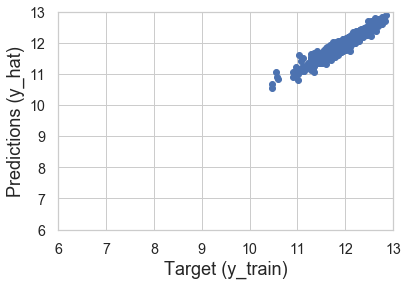

In [81]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Target (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

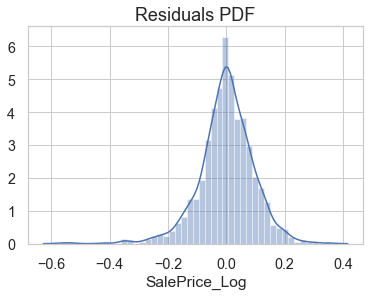

In [82]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [83]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9283007624228653

In [84]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x_train,y_train)

0.9061103611961319

### Finding the weights and bias

In [85]:
# Obtain the bias (intercept) of the regression
reg.intercept_

5065277470.811614

In [86]:
reg.p

array([0.10595253, 0.8303032 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14528489, 0.42387252, 0.04223883, 0.19301943, 0.00048533,
       0.58820424, 0.17825833, 0.37922148, 0.00138136, 0.54004502,
       0.46718167, 0.41455122, 0.        , 0.        , 0.        ,
       0.        , 0.02774642, 0.28193094, 0.91357595, 0.31234038,
       0.44912962, 0.8936194 , 0.70321354, 0.14612598, 0.48774203,
       0.07307612, 0.86244029, 0.008182  , 0.9681405 , 0.00495694,
       0.95950351, 0.00044554, 0.46943274, 0.41908326, 0.89447999,
       0.53252827, 0.5638453 , 0.01814849, 0.0092729 , 0.57282906,
       0.55480225, 0.00042412, 0.35077888, 0.23463948, 0.84164867,
       0.59388083, 0.76803812, 0.0500217 , 0.12716033, 0.45388682,
       0.38989528, 0.34199141, 0.07762514, 0.17463121, 0.77881425,
       0.68565491, 0.67684267, 0.03607539, 0.29325158, 0.13924334,
       0.43318239, 0.83609193, 0.8706478 , 0.88063913, 0.00522

In [102]:
reg_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary['p-value'] = reg.p.round(3)
reg_summary

,Features,Coefficients,Weights,p-value
0,MSSubClass,-0.04,-0.04,0.11
1,MasVnrArea,-0.00,-0.00,0.83
2,BsmtFinSF1,-79821255051.91,-79821255051.91,0.00
3,BsmtFinSF2,-35616105635.83,-35616105635.83,0.00
4,BsmtUnfSF,-94124462776.23,-94124462776.23,0.00
5,TotalBsmtSF,76293334246.72,76293334246.72,0.00
6,1stFlrSF,-67639875425.15,-67639875425.15,0.00
7,2ndFlrSF,-95911418139.21,-95911418139.21,0.00
8,LowQualFinSF,-9944405778.52,-9944405778.52,0.00
9,GrLivArea,100306939855.45,100306939855.45,0.00


In [103]:
data_cleaned['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

## Testing

In [91]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

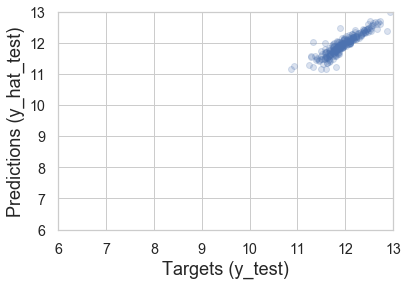

In [92]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [93]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,144823.249660
1,266622.840118
2,98526.067706
3,442980.391296
4,262954.258624


In [94]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,144823.249660,NaN
1,266622.840118,NaN
2,98526.067706,NaN
3,442980.391296,NaN
4,262954.258624,NaN
...,...,...
248,135584.635595,NaN
249,103185.132031,NaN
250,153853.349211,179200.0
251,236578.162211,NaN


In [95]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    11.740061
1    11.898188
2    11.512925
3    12.929991
4    12.485827
Name: SalePrice_Log, dtype: float64

In [96]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,144823.249660,125500.0
1,266622.840118,147000.0
2,98526.067706,100000.0
3,442980.391296,412500.0
4,262954.258624,264561.0
...,...,...
248,135584.635595,135500.0
249,103185.132031,109500.0
250,153853.349211,162000.0
251,236578.162211,235000.0


In [97]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [98]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,144823.249660,125500.0,-19323.249660,15.397012
1,266622.840118,147000.0,-119622.840118,81.376082
2,98526.067706,100000.0,1473.932294,1.473932
3,442980.391296,412500.0,-30480.391296,7.389186
4,262954.258624,264561.0,1606.741376,0.607324
...,...,...,...,...
248,135584.635595,135500.0,-84.635595,0.062462
249,103185.132031,109500.0,6314.867969,5.767003
250,153853.349211,162000.0,8146.650789,5.028797
251,236578.162211,235000.0,-1578.162211,0.671558


In [99]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,2.530000e+02,253.000000,2.530000e+02,253.000000
mean,inf,162933.434783,-inf,inf
std,NaN,57938.679533,NaN,NaN
min,6.971423e+04,52000.000000,-inf,0.062462
25%,1.231558e+05,125000.000000,-9.681684e+03,2.949037
50%,1.534501e+05,147000.000000,-6.403915e+02,6.347780
75%,1.942931e+05,189000.000000,9.167227e+03,12.705328
max,inf,412500.000000,1.492371e+05,inf


In [100]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
248,135584.64,135500.00,-84.64,0.06
234,325299.02,325000.00,-299.02,0.09
83,335408.82,335000.00,-408.82,0.12
147,254553.08,255000.00,446.92,0.18
162,191342.16,191000.00,-342.16,0.18
133,94763.16,94500.00,-263.16,0.28
237,92739.04,93000.00,260.96,0.28
19,132082.57,132500.00,417.43,0.32
121,280000.92,281213.00,1212.08,0.43
161,175708.72,176500.00,791.28,0.45


In [101]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_hat_test))
print(metrics.mean_squared_error(y_test, y_hat_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

25246303856.29735
8.066891249775124e+22
284022732360.89966
